# 700_Analysis_Q3B


# _ Question Three: Does Location Impact Road Safety?_

## _ (B): Are drivers from lower IMD Decile areas involved in the most road accidents?_


## Purpose

We will now begin to analyse and explore our newly validated and prepared datasets. In this notebook we will explore whether the IMD Decile of an area of drivers impacts road accident likelihood. In particular, we will analyse whether drivers from 'most' deprived areas are involved in more accidents than drivers from 'least' deprived areas. To do this, we will use our 'Driver_IMD_Decile' column.


For the purpose of this research question, we will be using the UK government's IMD Decile metric, guidelines viewable [here](https://assets.publishing.service.gov.uk/government/uploads/system/uploads/attachment_data/file/464430/English_Index_of_Multiple_Deprivation_2015_-_Guidance.pdf)

### Notebook Contents:

* __1:__ A Closer look at the Data

* __2:__ IMD Decile of Driver
    * __2.1:__ Simple Bar Chart Analysis
    * __2.2:__ Normalising
     
     
* __3:__ Saving to Pickle Files & Creating Data Dictionaries


## Datasets

* __Input__: 

* 900_Q3B_final_prep_1.pkl (Fully prepared dataset 1 of UK Road Safety Data from 1999 - 2014, for RQ3(B))


* 900_Q3B_final_prep_2.pkl (Fully prepared dataset 2 of UK Road Safety Data from 1999 - 2014, for RQ3(B))


* __Output__: 

* 300_analysis_Q1C_norm_all_IMD.pkl (All IMD_Decile's of drivers for each recorded UK Road Accident 1999 - 2014)

In [1]:
import os
import sys

import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

module_path = os.path.abspath(os.path.join('../../data/..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
from src.helpers import data_dictionary

%matplotlib inline

Since we have cleaned our initial dataset and saved only the columns which are relevant to this research question in separate pickle files, we will read in these cleaned datasets for the purpose of answering this research question.

In [2]:
Q3B_1 = pd.read_pickle('../../data/processed/900_Q3B_final_prep_1.pkl')
Q3B_1.shape

(1246275, 16)

In [3]:
Q3B_2 = pd.read_pickle('../../data/processed/900_Q3B_final_prep_2.pkl')
Q3B_2.shape

(2133735, 16)

## 1.
## A Closer Look at the Data

In [4]:
Q3B_1.head(2)

,Accident_Index,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Special_Conditions_at_Site,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Driver_IMD_Decile,Date_Day,Month,Year
8521268,1999010SU0945,-0.271752,51.715661,1,1,25/12/1999,sunday,33,none,rural,car,female,most deprived 10%,25,12,1999
8521270,1999010SU0946,-0.239977,51.695136,2,1,17/12/1999,saturday,33,none,rural,car,male,most deprived 40-50%,17,12,1999


In [5]:
Q3B_2.tail(2)

,Accident_Index,Longitude,Latitude,Number_of_Vehicles,Number_of_Casualties,Date,Day_of_Week,Local_Authority_(District),Special_Conditions_at_Site,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Driver_IMD_Decile,Date_Day,Month,Year
3004421,2014984138414,-3.191397,54.990446,3,2,17/12/2014,thursday,917,none,rural,van / goods 3.5 tonnes mgw or under,male,most deprived 10%,17,12,2014
3004422,2014984138414,-3.191397,54.990446,3,2,17/12/2014,thursday,917,none,rural,car,male,less deprived 20-30%,17,12,2014


Above, we have shown the first two and last two lines of data we will be using to answer research Question Three (B).

It is important to note that for this question, we will be using data from _1999 - 2014_ only.

## 2.
## IMD Decile of Driver

Below I will group our datasets by our 'Driver_IMD_Decile' column, to gain further insight into the distribution of accidents involving drivers from each decile.

In [6]:
group_by_IMD_1 = Q3B_1.groupby('Driver_IMD_Decile').size().to_frame()

In [7]:
group_by_IMD_2 = Q3B_2.groupby('Driver_IMD_Decile').size().to_frame()

## 2.1
## Simple Bar Chart Analysis

Once we have grouped the total number of accidents within each IMD Decile, we will plot it on a graph below to gain a further insight into the data.

Firstly, we must aggregate the two datasets from above.

In [16]:
all_IMD = pd.concat([group_by_IMD_1, group_by_IMD_2]).groupby(level=0).sum()

Text(0.5,0,'Total Road Accidents')

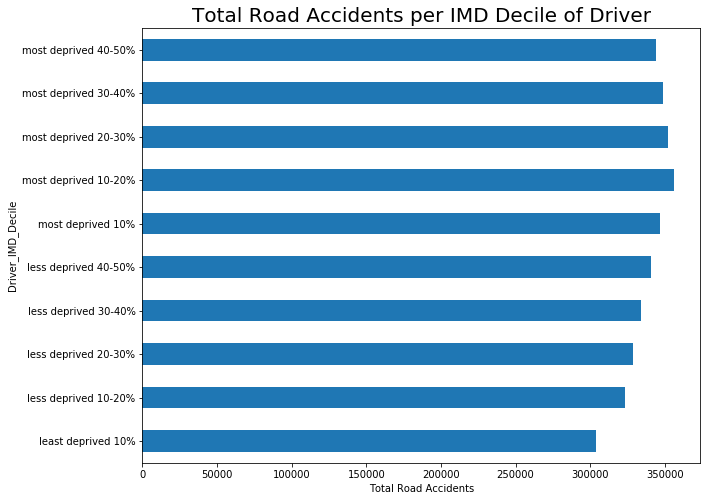

In [17]:
all_IMD.plot(kind='barh', legend=False, figsize=(10,8))
plt.title('Total Road Accidents per IMD Decile of Driver', fontsize=20)
plt.xlabel('Total Road Accidents')

The above graph has given some insight into the number of road accidents for each IMD Decile region. However, this does not fairly represent drivers from each IMD Decile. Below, we will normalise our data based on the total numbers of drivers for each IMD Decile to get a percentage value.

## 2.2 
## Normalising

When we normalise, we are getting the sum of the all columns for each row in the dataset.

In [10]:
norm_all_IMD = all_IMD.copy() #create a copy of original dataset for normalisation

In [11]:
cols = norm_all_IMD.columns #define columns to normalise

In [12]:
 sum_rows = norm_all_IMD[cols].sum(axis=0) #calculate the sum of each row

In [13]:
norm_all_IMD[cols] = norm_all_IMD[cols].div(sum_rows, axis=1) #normalise all columns in the dataset by dividing them by the sum of each row

In [14]:
norm_all_IMD[cols] = 100*norm_all_IMD[cols] #multiply normalised data by 100 to get a percentage value.

Text(0.5,0,'% of Road Accidents')

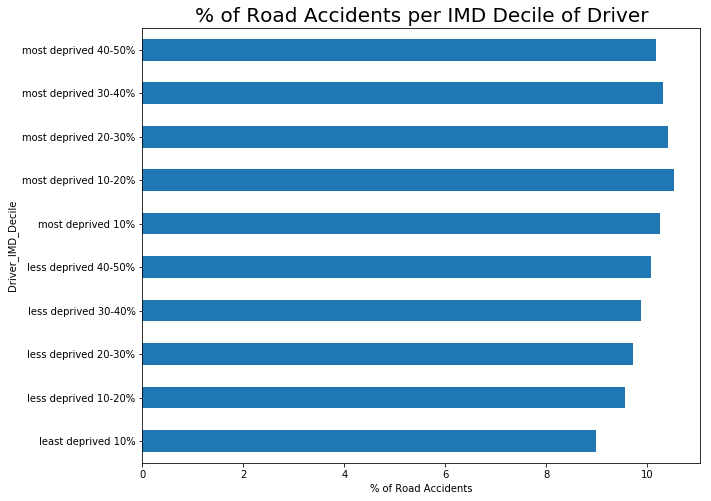

In [15]:
norm_all_IMD.plot(kind='barh',legend=False, figsize=(10,8)) #plot normalised graph
plt.title('% of Road Accidents per IMD Decile of Driver', fontsize=20)
plt.xlabel('% of Road Accidents')

From this normalised graph, the results remain very much the same. We can clearly see that drivers from the 'most deprived 10-20%' IMD Decile have been involved in the most road accidents. 

It would also appear that from this graph, drivers from the 'least deprived 10%' IMD Decile have been involved in the least amount of road accidents. This gives us a further insight into how Driver IMD Decile _may_ impact road safety.

## 3.
## Saving Pickle Files & Data Dictionaries

Once we have normalised our data, we will save it into a pickle file. We will also create a data dictionary to summarise the contents of the file.

In [51]:
norm_all_IMD.to_pickle("../../data/analysis/300_analysis_Q1C_norm_all_IMD.pkl")
norm_all_IMD.shape

(10, 1)

In [52]:
data_dictionary.save(
    '../../data/analysis/300_analysis_Q1C_norm_all_IMD.pkl', 
    "Updated Roadsafety dataset with Occupational_Relational column").head()

,count,mean,std,min,25%,50%,75%,max,Missing,%Missing
0,10.0,10.0,0.465547,9.000328,9.760696,10.137677,10.308867,10.53562,0,0.0
